# Classifying Detected Faces using idea of Eigen Faces


In [5]:
# Importing all the important libraries which we will require in further steps
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

#### We need to resize our image as we take input, since from our analysis of the viola jones algorthim we got to know that maximum sized face in image lies between width and height of 104 and 104 respectively.

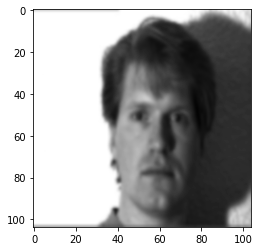

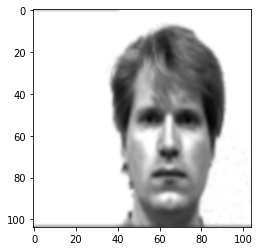

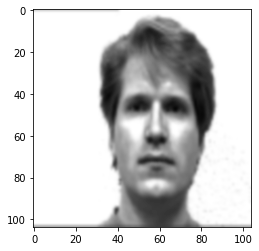

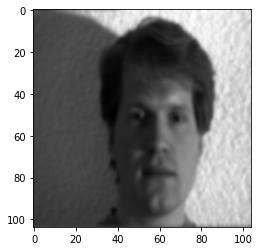

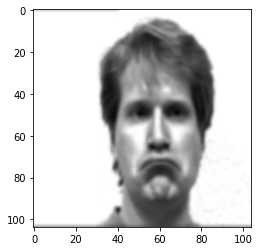

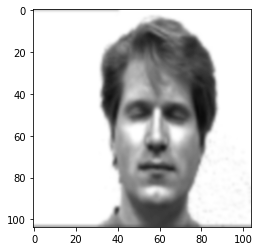

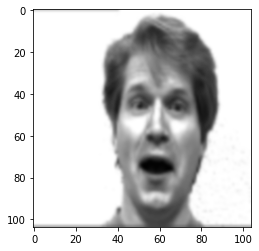

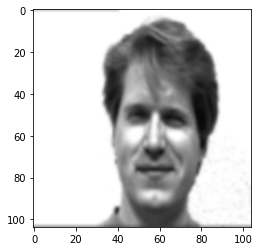

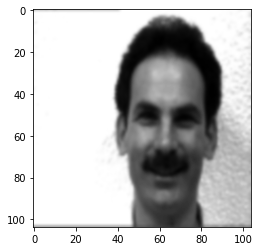

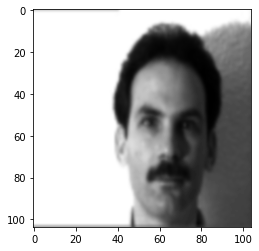

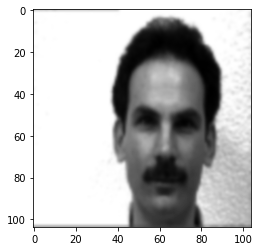

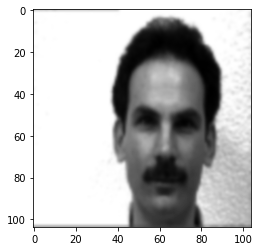

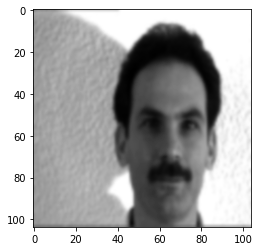

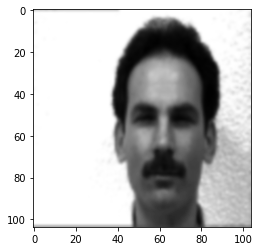

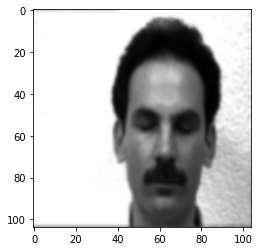

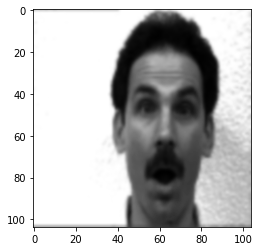

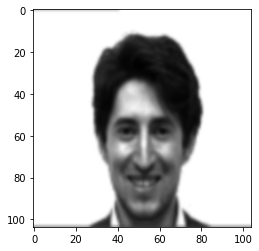

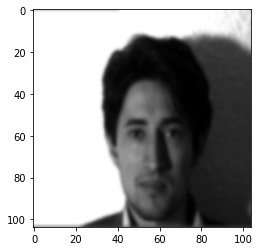

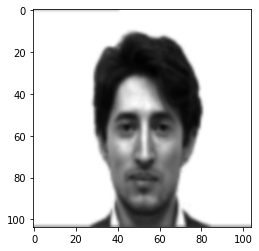

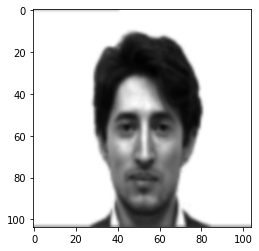

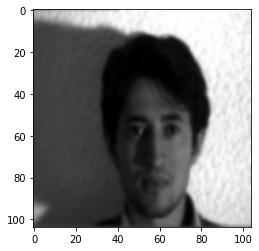

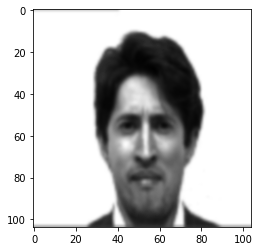

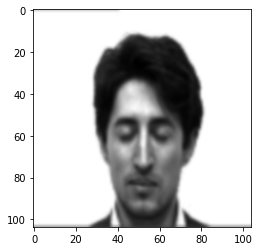

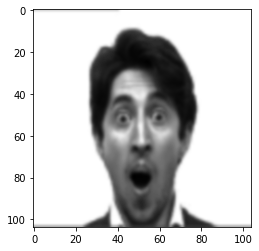

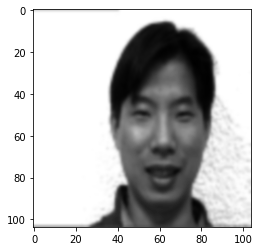

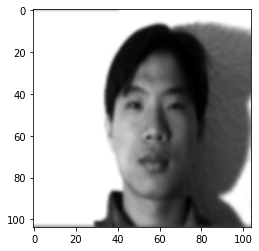

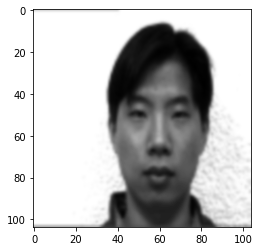

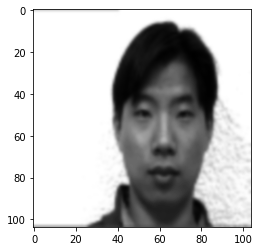

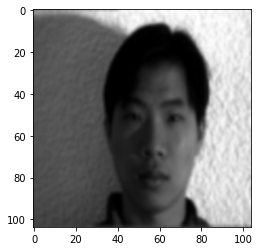

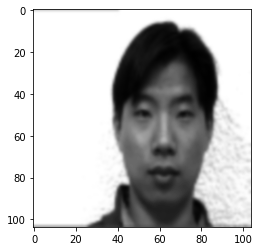

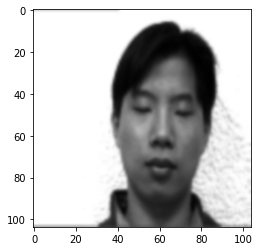

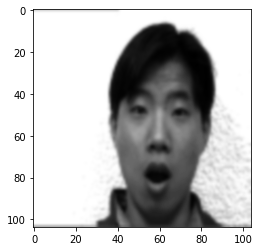

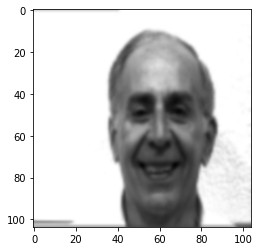

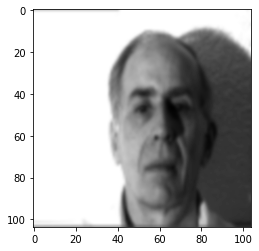

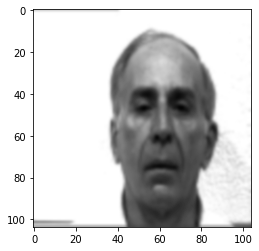

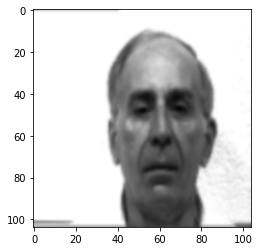

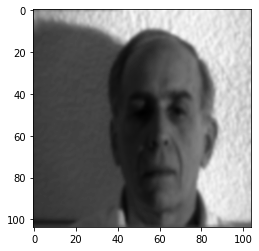

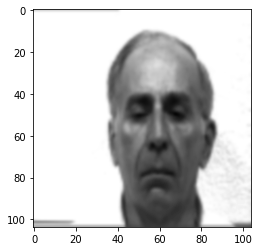

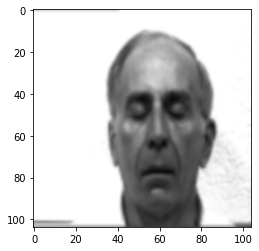

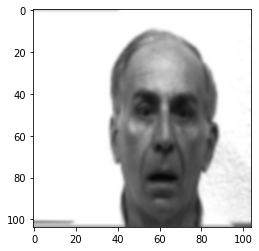

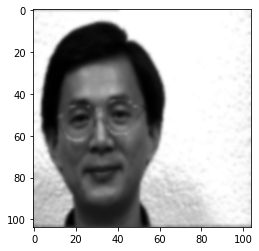

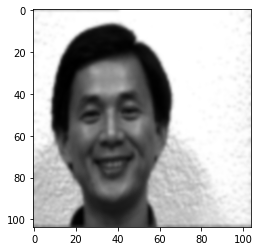

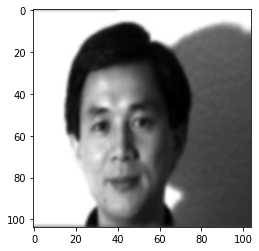

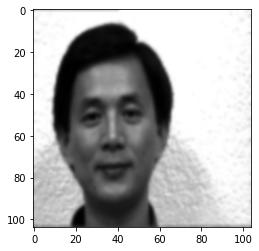

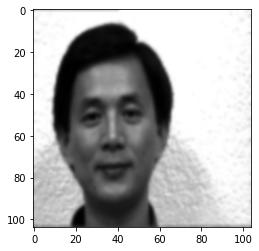

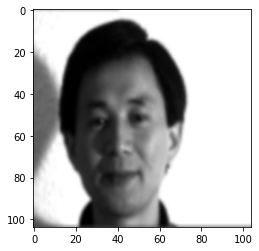

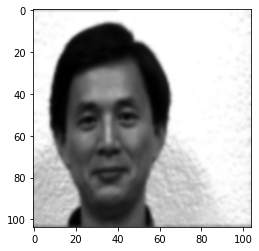

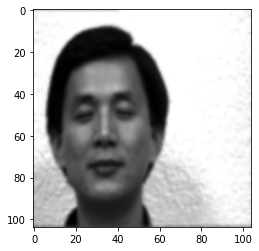

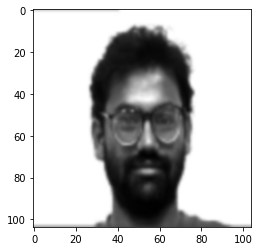

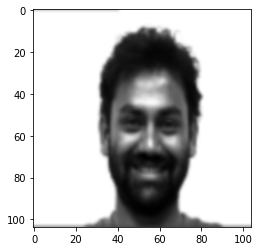

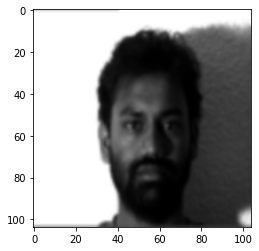

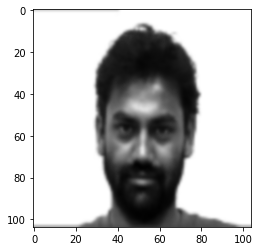

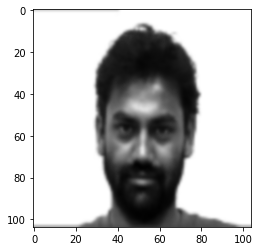

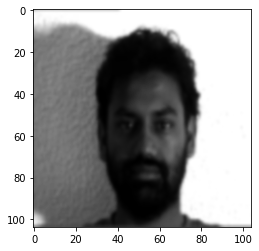

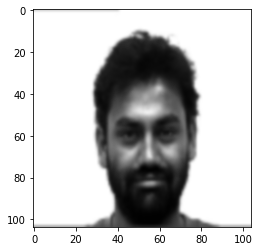

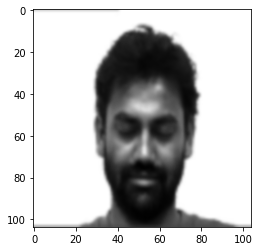

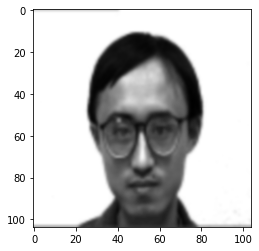

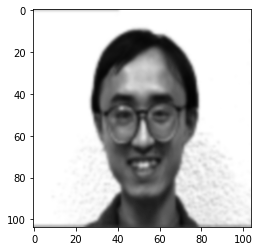

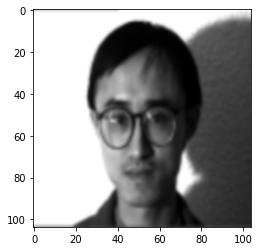

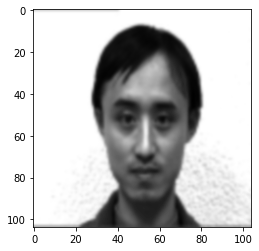

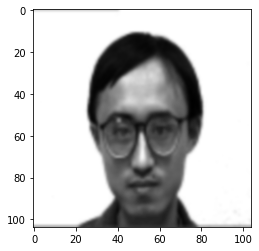

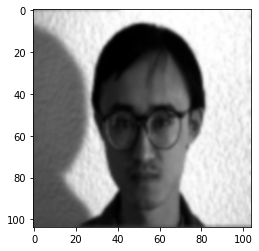

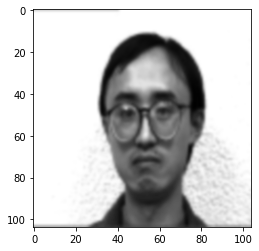

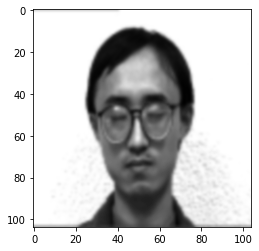

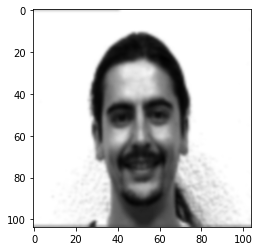

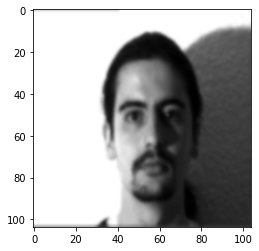

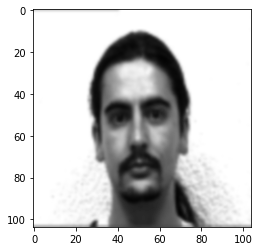

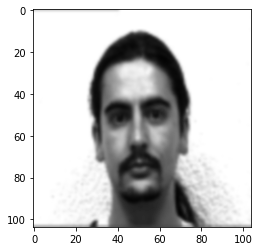

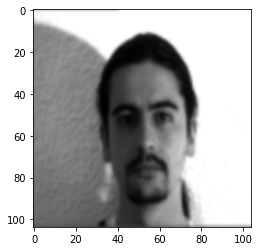

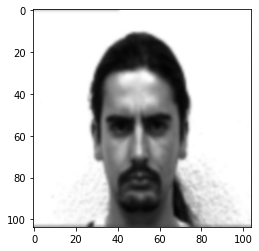

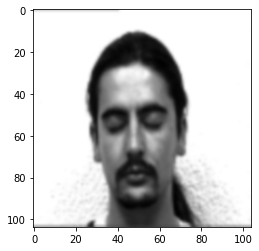

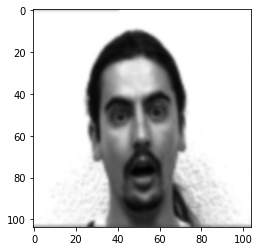

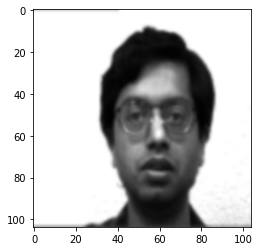

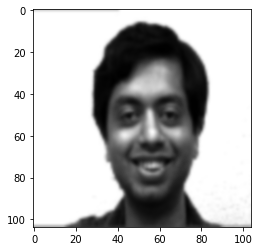

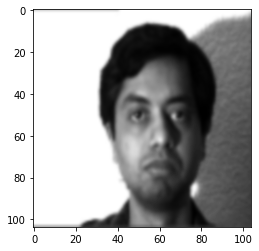

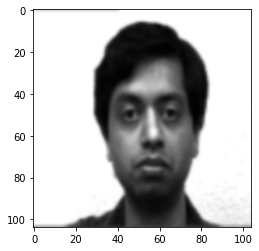

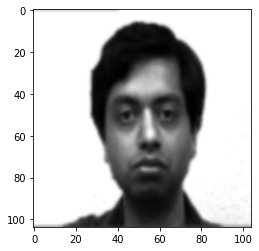

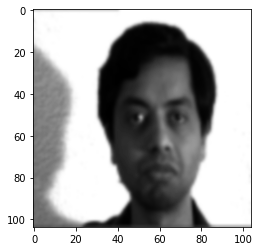

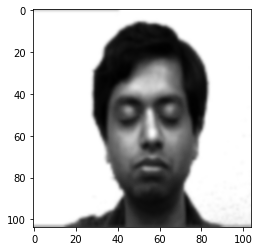

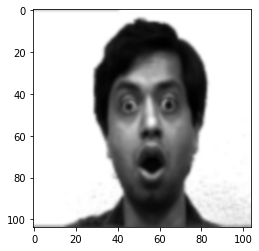

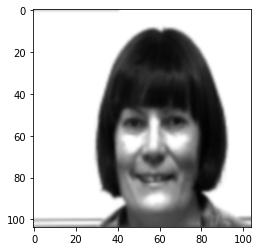

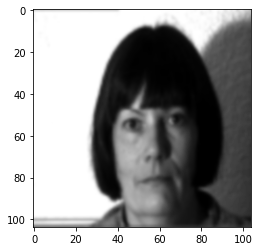

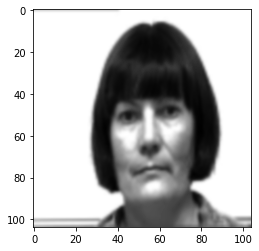

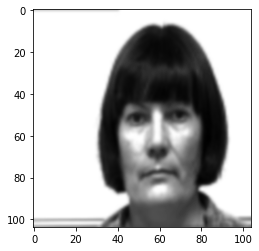

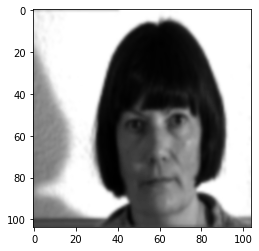

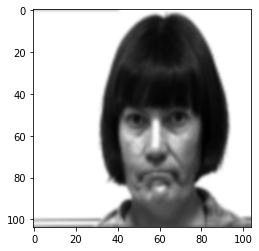

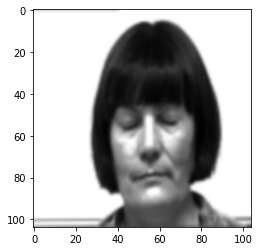

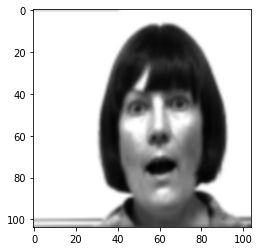

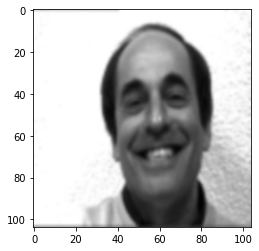

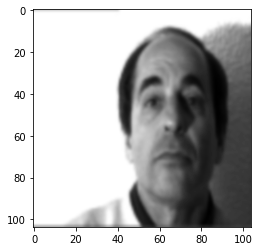

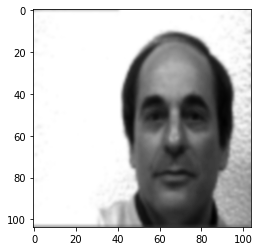

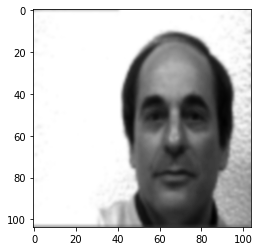

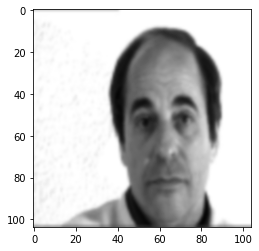

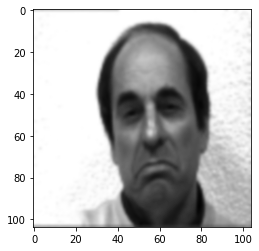

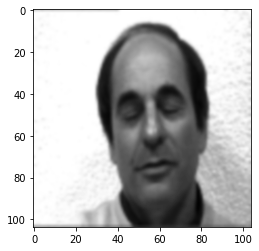

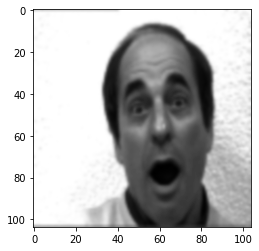

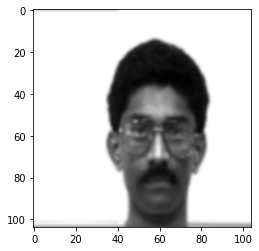

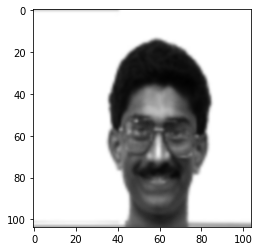

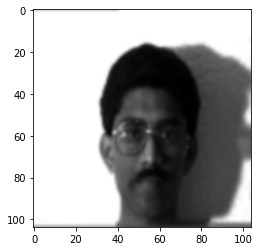

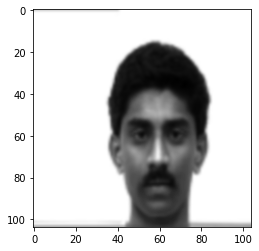

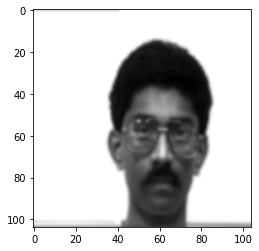

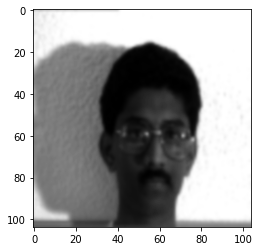

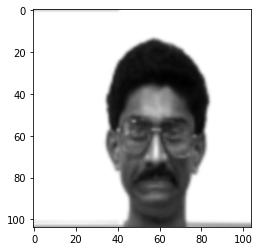

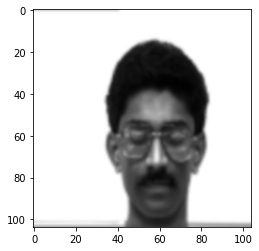

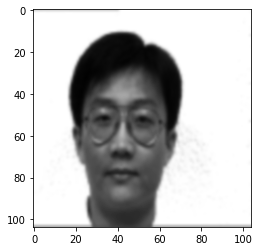

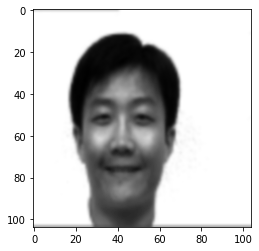

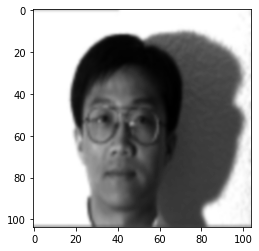

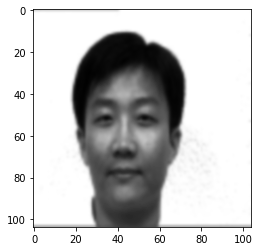

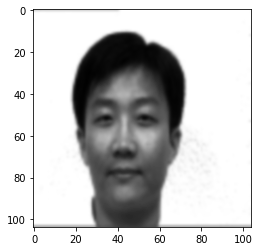

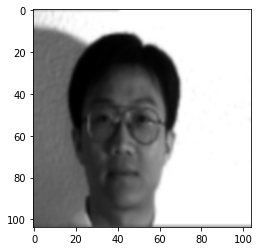

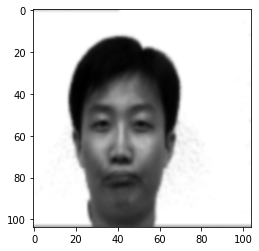

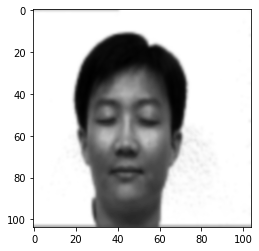

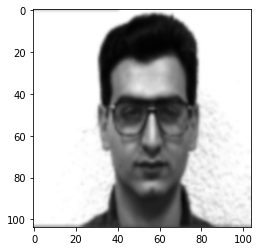

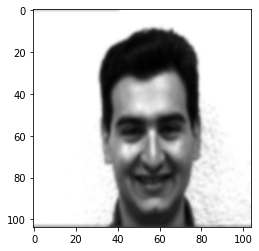

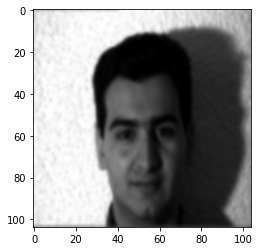

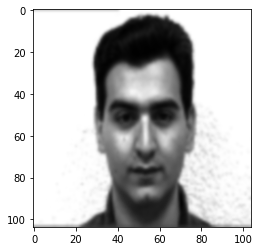

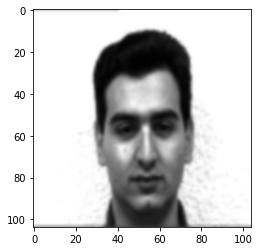

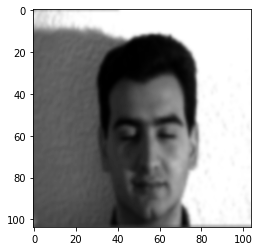

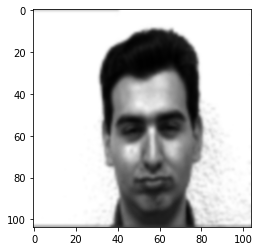

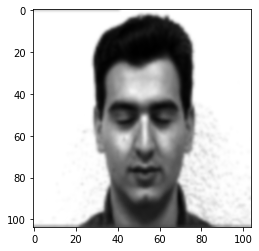

(10816, 120)
[[201 201 201 ... 159 201 201]
 [201 201 201 ... 168 201 201]
 [201 201 201 ... 188 201 201]
 ...
 [135 174 174 ... 171 173 170]
 [140 174 174 ... 173 173 165]
 [143 174 174 ... 173 158 175]]


In [42]:
total_pixels = 10816
images_train = 8 # Training Images
variants = 15  # Total Number of Subjects 
total_images = images_train*variants

face_vector = []
# Running two for loops for training all the variants and 8 images of each images 
# Hence total images used for training =120
for i in range(1, variants+1):
    for j in range(1, images_train+1):
        if (i<10):
            face_image = cv2.cvtColor(cv2.imread("train/Subject0"+str(i)+" (" + str(j) + ").jpg"), cv2.COLOR_RGB2GRAY)
            # Mention the width and height of the size of the images 
            width = 104
            height = 104
            dim = (width, height)
 
            # resize image
            face_image = cv2.resize(face_image, dim, interpolation = cv2.INTER_AREA)
        else:
            face_image = cv2.cvtColor(cv2.imread("train/Subject"+str(i)+" (" + str(j) + ").jpg"), cv2.COLOR_RGB2GRAY)
            width = 104
            height = 104
            dim = (width, height)
 
            # resize image
            face_image = cv2.resize(face_image, dim, interpolation = cv2.INTER_AREA)
        plt.imshow(face_image, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
        # Plotting image for verification
        face_image = face_image.reshape(total_pixels,)
        # We also change our shape in above step
        face_vector.append(face_image)
        # Finally we store each image data into the face_vector
    
face_vector = np.asarray(face_vector)
face_vector = face_vector.transpose()

print(face_vector.shape)
print(face_vector)

#### Now taking all the images and appending them into the facevector we need to subtract each vector with it's mean. Hence we get normalized face vector

In [43]:
avg_face_vector = face_vector.mean(axis=1) # Taking mean along axis=1 
avg_face_vector = avg_face_vector.reshape(face_vector.shape[0], 1) # Reshaping vector to subtract it 
normalized_face_vector = face_vector - avg_face_vector # Now subtracting each vector with mean and this normalization
print(normalized_face_vector)

[[  7.775        7.775        7.775      ... -34.225        7.775
    7.775     ]
 [  6.05         6.05         6.05       ... -26.95         6.05
    6.05      ]
 [  5.275        5.275        5.275      ...  -7.725        5.275
    5.275     ]
 ...
 [ -9.525       29.475       29.475      ...  26.475       28.475
   25.475     ]
 [ -5.91666667  28.08333333  28.08333333 ...  27.08333333  27.08333333
   19.08333333]
 [  0.55833333  31.55833333  31.55833333 ...  30.55833333  15.55833333
   32.55833333]]


#### Covariance Matrix Calculation from the Normalized Vectors of Each Image.

In [44]:
covariance_matrix = np.cov(np.transpose(normalized_face_vector))
print(covariance_matrix)

[[ 7135.55123252  1677.95284541  1007.63837433 ... -4568.29151024
    -66.70706089  -984.24448088]
 [ 1677.95284541  2724.07587853   448.87689574 ... -1218.61996653
   -473.10453375  -849.68322177]
 [ 1007.63837433   448.87689574  1850.42961998 ...  -710.31428453
     62.07375967   -21.44972611]
 ...
 [-4568.29151024 -1218.61996653  -710.31428453 ...  6354.81426635
    364.30136077   381.15223038]
 [  -66.70706089  -473.10453375    62.07375967 ...   364.30136077
   2093.30753961   367.91063954]
 [ -984.24448088  -849.68322177   -21.44972611 ...   381.15223038
    367.91063954  3448.51324958]]


####  Since Python can do ton's of calculation each second we don't need to go for the second step of the calculating smaller matrix.

In [45]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [47]:
# This is would the step called as PCA
# Here we take only top 60 eigen vectors for the further prediction of the test images
# If k is small we reduce the complexity of model heavily
print(eigen_vectors.shape)
k = 60
k_eigen_vectors = eigen_vectors[0:k, :]
print(k_eigen_vectors.shape)

(120, 120)
(60, 120)


In [48]:
# Now we need to lower the dimension and also we complete the step of having dot product with the transpose of the normalized
# face vector
eigen_faces = k_eigen_vectors.dot(np.transpose(normalized_face_vector))
print(eigen_faces.shape)

(60, 10816)


In [49]:
# Now the there are K eigenvector which carries information of all the images 
# All the image normalized vector are the linear combination of the selcted K eigenvectors 
# And hence we calculate the weights of such linear combination
weights = np.transpose(normalized_face_vector).dot(np.transpose(eigen_faces))
print(weights)


[[-19751293.08461218-512723.31719035j -30833963.95790347-512723.31719035j
   41071047.00050665-512723.31719038j ...
  -21148717.96916098-512723.31719036j  24041258.84470751-512723.31719038j
   41889351.93616537-512723.31719034j]
 [-13866656.53824024+118792.51405259j  -5290483.56858655+118792.51405259j
    8416135.42293709+118792.51405259j ...
    3614185.82647408+118792.51405258j  15671292.44183596+118792.51405259j
   19593882.12448596+118792.51405259j]
 [ -8923876.6041844 +233474.78611274j    663862.44374345+233474.78611274j
    6198499.72604148+233474.78611275j ...
    4428246.09014259+233474.78611274j  13062070.37996404+233474.78611275j
    8777386.41807092+233474.78611273j]
 ...
 [ 30226678.38135644-265850.98779615j  14296439.86852476-265850.98779616j
  -18471496.92830129-265850.98779616j ...
   -4085791.02974588-265850.98779614j -33746605.54521682-265850.98779615j
  -46864329.58240522-265850.98779615j]
 [-14818874.21051635+267675.23917903j   4166257.90704249+267675.23917903j
   -4

In [ ]:
# The below algorithm can be use for the manual looking that what would be predicted for each case

test_add = "test/Subject05 (11).jpg"
test_img = cv2.imread(test_add)
test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)
# Again Redefining the Image
width = 104
height = 104
dim = (width, height)
 
# resize image
test_img = cv2.resize(test_img, dim, interpolation = cv2.INTER_AREA)


test_img = test_img.reshape(total_pixels, 1)
test_normalized_face_vector = test_img - avg_face_vector
test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))


index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))  
     
if(index>=0 and index <8):
    print("Prediction : Subject01")
if(index>=8 and index<16):
    print("Prediction : Subject02")
if(index>=16 and index<24):
    print("Prediction : Subject03")
if(index>=24 and index<32):
    print("Prediciton : Subject04")
if(index>=32 and index<40):
    print("Prediction : Subject05")

#### The below code is written for calculating the accuracy

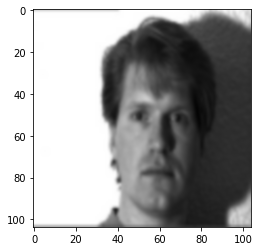

Real : 1
Predicted : 1


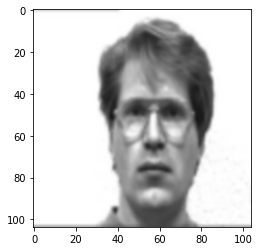

Real : 1
Predicted : 1


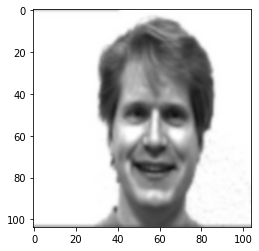

Real : 1
Predicted : 1


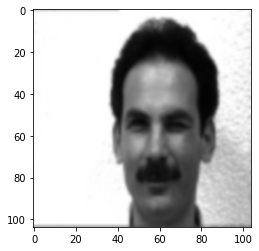

Real : 2
Predicted : 2


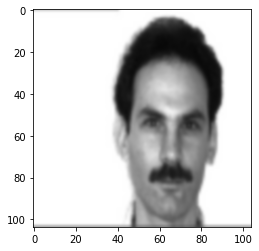

Real : 2
Predicted : 1


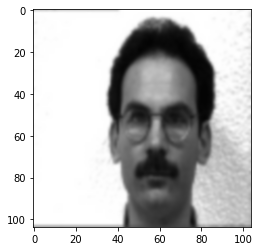

Real : 2
Predicted : 4


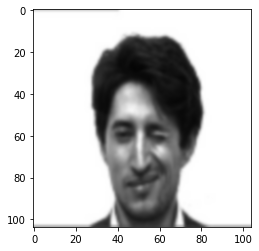

Real : 3
Predicted : 3


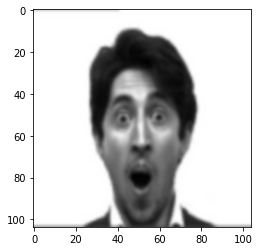

Real : 3
Predicted : 3


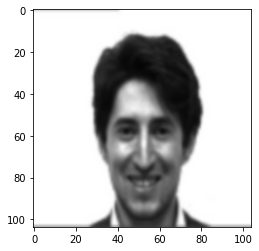

Real : 3
Predicted : 3


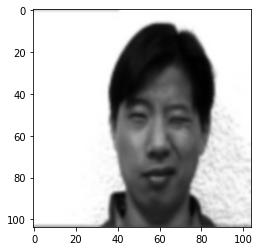

Real : 4
Predicted : 4


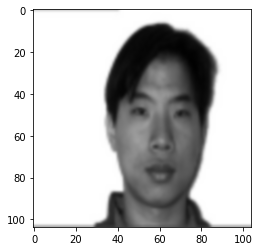

Real : 4
Predicted : 4


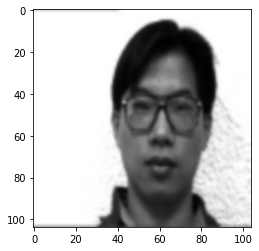

Real : 4
Predicted : 4


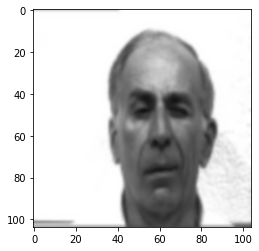

Real : 5
Predicted : 5


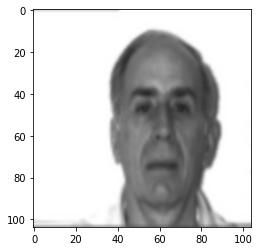

Real : 5
Predicted : 5


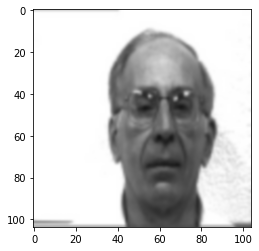

Real : 5
Predicted : 5


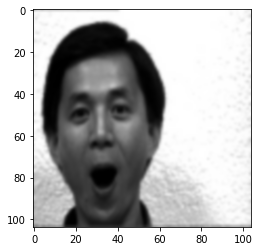

Real : 6
Predicted : 6


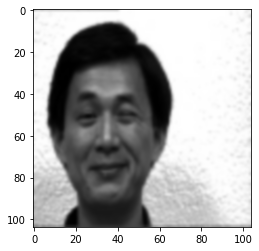

Real : 6
Predicted : 6


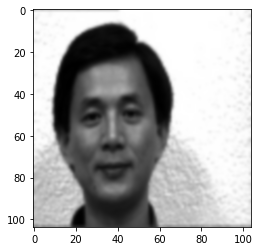

Real : 6
Predicted : 6


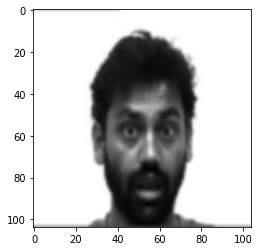

Real : 7
Predicted : 7


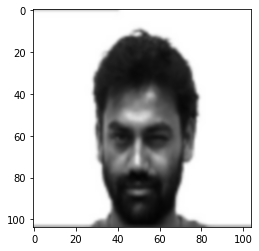

Real : 7
Predicted : 7


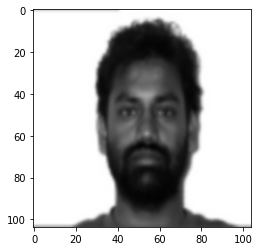

Real : 7
Predicted : 10


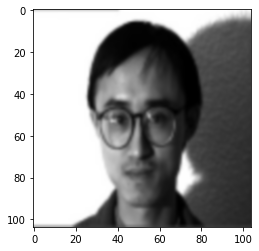

Real : 8
Predicted : 8


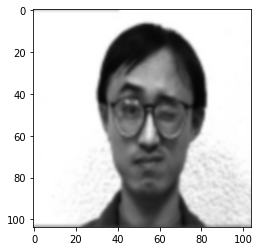

Real : 8
Predicted : 10


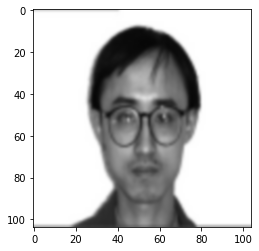

Real : 8
Predicted : 8


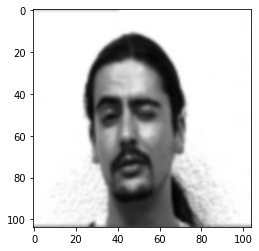

Real : 9
Predicted : 9


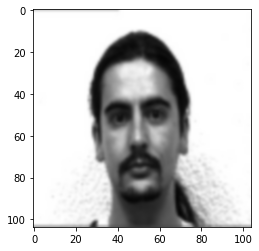

Real : 9
Predicted : 9


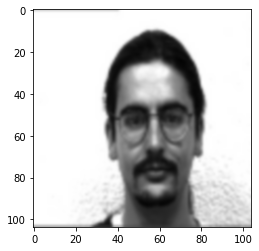

Real : 9
Predicted : 8


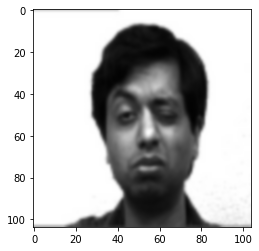

Real : 10
Predicted : 10


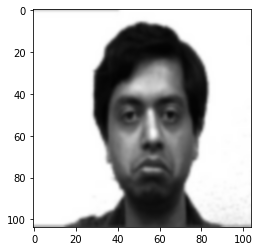

Real : 10
Predicted : 10


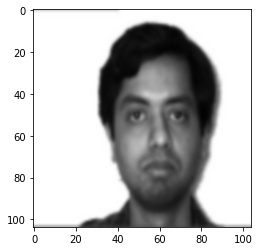

Real : 10
Predicted : 10


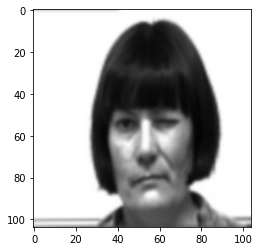

Real : 11
Predicted : 11


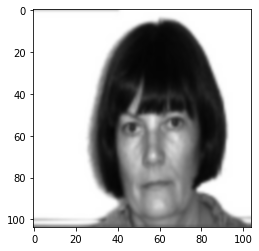

Real : 11
Predicted : 11


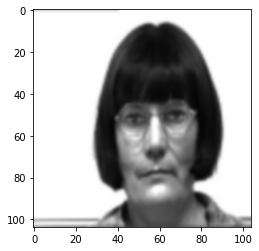

Real : 11
Predicted : 11


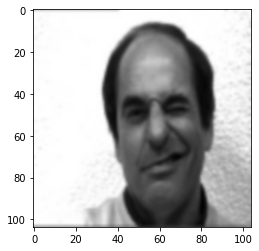

Real : 12
Predicted : 12


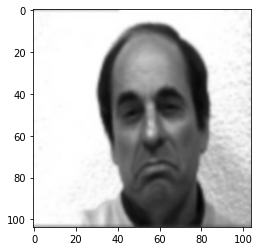

Real : 12
Predicted : 12


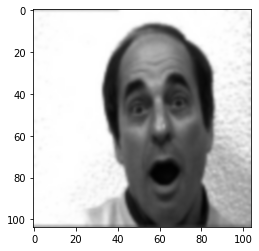

Real : 12
Predicted : 12


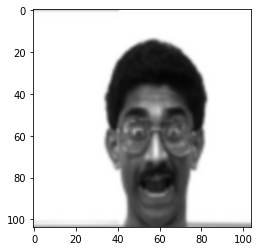

Real : 13
Predicted : 13


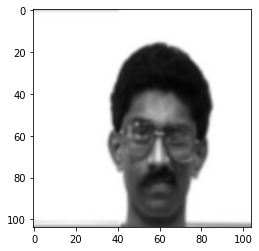

Real : 13
Predicted : 13


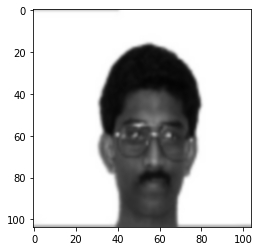

Real : 13
Predicted : 7


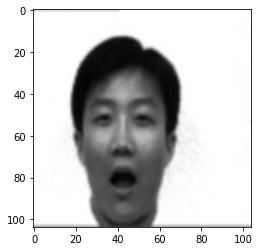

Real : 14
Predicted : 14


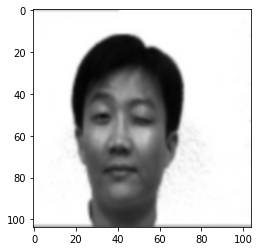

Real : 14
Predicted : 14


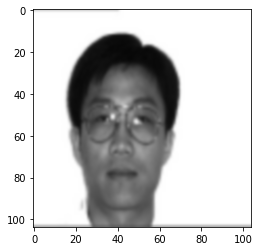

Real : 14
Predicted : 14


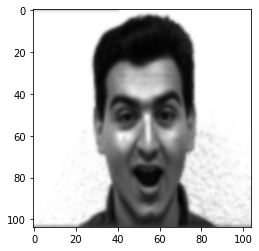

Real : 15
Predicted : 15


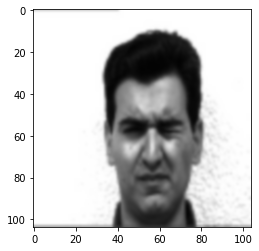

Real : 15
Predicted : 15


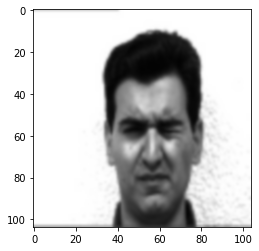

Real : 15
Predicted : 15
Accuracy :  86.66666666666667


In [51]:
no_of_images_test=3
accuracy=0

for i in range(1, variants+1):
    for j in range(images_train+1,images_train+1+no_of_images_test):
        if (i<10):
            test_add="test/Subject0"+str(i)+" ("+str(j)+").jpg"
            test_img = cv2.imread(test_add)
            width = 104
            height = 104
            dim = (width, height)
 
            # resize image
            test_img = cv2.resize(test_img, dim, interpolation = cv2.INTER_AREA)
        else:
            test_add="test/Subject"+str(i)+" ("+str(j)+").jpg"
            test_img = cv2.imread(test_add)
            width = 104
            height = 104
            dim = (width, height)
 
            # resize image
            test_img = cv2.resize(test_img, dim, interpolation = cv2.INTER_AREA)
        plt.imshow(test_img, cmap = 'gray', interpolation = 'bicubic')
        plt.show()
            
        # The steps which are followed by the train images are same for the test images 
        test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2GRAY)

        # Again we generate weights and normalized vectors by the mean vector of the training
        test_img = test_img.reshape(total_pixels, 1)
        test_normalized_face_vector = test_img - avg_face_vector
        test_weight = np.transpose(test_normalized_face_vector).dot(np.transpose(eigen_faces))

        # In this step we obtain minimum of all the weights
        index =  np.argmin(np.linalg.norm(test_weight - weights, axis=1))  
        
        predicted=math.floor(index/images_train)+1
        
        print("Real : "+str(i))
        print("Predicted : "+str(predicted))
        # After our Prediction matches with real scenario we increase value in accuracy variable.
        if predicted==i:
            accuracy=accuracy+1

            
accuracy=(accuracy*100)/(variants*no_of_images_test)
print("Accuracy : " ,accuracy)

####  References : https://github.com/xanmolx/FaceDetectorUsingPCA/blob/master/PCA_Face_Recognition_IIT2016040.ipynb
####                        https://www.youtube.com/watch?v=g4Urfno4aTc&t=1657s
####  Discussion Collabarators : Kamlesh Sawadekar ; Unnat Dave 
####  Ideas are influenced by the above sources, so the variable names or the steps might look similar but each step is being understood in written by me while reading the paper
                  